In [2]:
# prompt: upload csv

from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
import pandas as pd

df=pd.read_csv('creditcard.csv')
df.head()

import numpy as np

In [5]:
success_trans = df[df.Class==0]
fraud_trans = df[df.Class==1]

success_trans.shape
legit = success_trans.sample(n=1000)

In [6]:
df = pd.concat([legit,fraud_trans],axis = 0)
df.shape

(1492, 31)

In [7]:
X=df.drop("Class",axis=1)
y=df.Class

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
log_class=LogisticRegression()
log_class.fit(X_train, y_train)

y_pred_lr=log_class.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9597855227882037


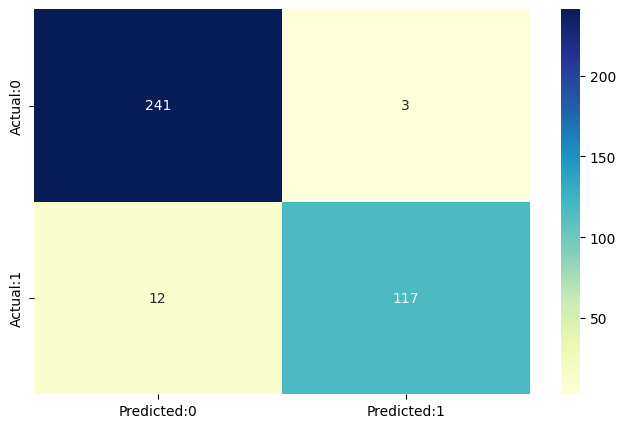

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_lr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

print(accuracy_score(y_test,y_pred_lr))

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

y_pred_svm=clf.predict(X_test)

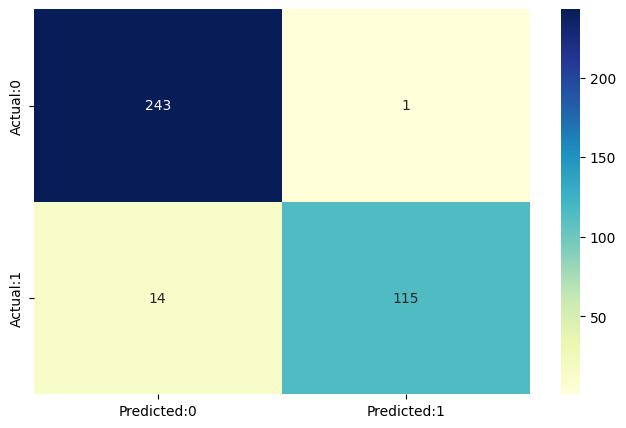

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_svm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [12]:
print(accuracy_score(y_test,y_pred_svm))

0.9597855227882037
